In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=yf.download('HES',start='2010-01-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
def strategy(df,sma1,sma2):
    df=df.copy()
    df['ret']=np.log(df.Close.pct_change()+1)
    df['SMA1']=df.Close.rolling(sma1).mean()
    df['SMA2']=df.Close.rolling(sma2).mean()
    df=df.dropna()
    df['position']=np.where(df['SMA1']>df['SMA2'],1,0)
    df['stratret']=df['position'].shift(1)*df['ret']
    df=df.dropna()
    return df

In [4]:
strategy(df,20,50)

,Open,High,Low,Close,Adj Close,Volume,ret,SMA1,SMA2,position,stratret
Date,,,,,,,,,,,
2010-03-16,60.779999,61.759998,60.340000,61.650002,51.570206,3079600,0.019988,60.382000,60.5856,0,0.000000
2010-03-17,62.020000,63.110001,61.990002,62.650002,52.406704,2901900,0.016090,60.476500,60.5754,0,0.000000
2010-03-18,62.450001,62.540001,60.799999,61.660000,51.578564,2830400,-0.015928,60.525500,60.5376,0,-0.000000
2010-03-19,61.189999,62.130001,60.459999,61.189999,51.185413,4025600,-0.007652,60.543000,60.4870,1,-0.000000
2010-03-22,60.490002,61.630001,60.279999,61.380001,51.344334,2495900,0.003100,60.605500,60.4158,1,0.003100
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-05,146.309998,147.529999,140.089996,140.589996,140.589996,2396900,-0.024104,144.227499,134.4580,1,-0.024104
2022-12-06,139.410004,141.490005,134.419998,135.610001,135.610001,1756800,-0.036065,143.570999,135.1554,1,-0.036065
2022-12-07,135.899994,136.720001,133.630005,134.770004,134.770004,1525200,-0.006213,142.895000,135.8290,1,-0.006213


In [5]:
def performance(df):
    return np.exp(df[['ret','stratret']].sum())

In [6]:
performance(strategy(df,20,50))

ret         2.139997
stratret    1.698343
dtype: float64

In [7]:
stratdf=strategy(df,20,50)
stratdf

,Open,High,Low,Close,Adj Close,Volume,ret,SMA1,SMA2,position,stratret
Date,,,,,,,,,,,
2010-03-16,60.779999,61.759998,60.340000,61.650002,51.570206,3079600,0.019988,60.382000,60.5856,0,0.000000
2010-03-17,62.020000,63.110001,61.990002,62.650002,52.406704,2901900,0.016090,60.476500,60.5754,0,0.000000
2010-03-18,62.450001,62.540001,60.799999,61.660000,51.578564,2830400,-0.015928,60.525500,60.5376,0,-0.000000
2010-03-19,61.189999,62.130001,60.459999,61.189999,51.185413,4025600,-0.007652,60.543000,60.4870,1,-0.000000
2010-03-22,60.490002,61.630001,60.279999,61.380001,51.344334,2495900,0.003100,60.605500,60.4158,1,0.003100
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-05,146.309998,147.529999,140.089996,140.589996,140.589996,2396900,-0.024104,144.227499,134.4580,1,-0.024104
2022-12-06,139.410004,141.490005,134.419998,135.610001,135.610001,1756800,-0.036065,143.570999,135.1554,1,-0.036065
2022-12-07,135.899994,136.720001,133.630005,134.770004,134.770004,1525200,-0.006213,142.895000,135.8290,1,-0.006213


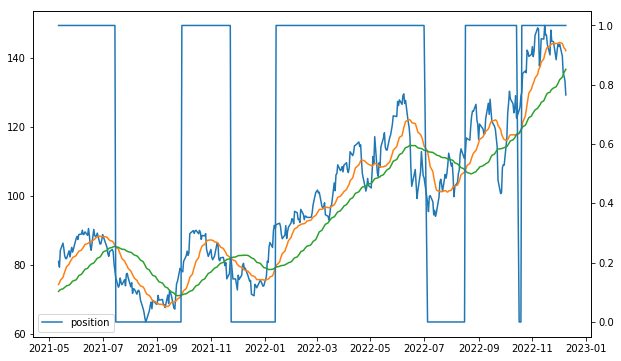

In [8]:
fig,ax=plt.subplots(figsize=(10,6))
ax2=ax.twinx()
ax.plot(stratdf[['Close','SMA1','SMA2']][-400:])
ax2.plot(stratdf['position'][-400:])
plt.legend()

In [9]:
SMA_list1=range(30,101,5)
SMA_list2=range(130,201,5)

In [10]:
profits=[]
a,b=[],[]
for i,e in zip(SMA_list1,SMA_list2):
    profit=performance(strategy(df,i,e))
    profits.append(profit)
    a.append(i)
    b.append(e)

In [11]:
pd.DataFrame(profits,[a,b]).reset_index()

,level_0,level_1,ret,stratret
0,30,130,2.390388,0.933140
1,35,135,2.425356,1.363243
2,40,140,2.477395,1.099998
3,45,145,2.401486,1.063925
4,50,150,2.296573,1.165155
5,55,155,2.432656,0.987315
6,60,160,2.487401,1.053559
7,65,165,2.592622,1.527416
8,70,170,2.355985,1.510084
9,75,175,2.376332,1.845459


In [12]:
def Tester(SMAlist1,SMA_list2):
    profits=[]
    a,b=[],[]
    for i,e in zip(SMA_list1,SMA_list2):
        profit=performance(strategy(df,i,e))
        profits.append(profit)
        a.append(i)
        b.append(e)
    col={'level_0':'SMA1','level_1':'SMA2'}
    frame=pd.DataFrame(profits,[a,b]).reset_index().rename(columns=col)
    frame['edge']=frame.stratret-frame.ret
    return frame.sort_values('edge',ascending=False)

In [13]:
Tester(SMA_list1,SMA_list2)

,SMA1,SMA2,ret,stratret,edge
9,75,175,2.376332,1.845459,-0.530873
10,80,180,2.352556,1.588446,-0.764110
8,70,170,2.355985,1.510084,-0.845901
11,85,185,2.236983,1.333051,-0.903932
1,35,135,2.425356,1.363243,-1.062113
7,65,165,2.592622,1.527416,-1.065207
4,50,150,2.296573,1.165155,-1.131418
13,95,195,2.068127,0.751261,-1.316867
3,45,145,2.401486,1.063925,-1.337561
12,90,190,2.122784,0.778381,-1.344403
